# **PROJECT: RDD** #

### Group 4: ###
**Sarbjit Kaur Choong**

## TASK ##

**To use RDD to estimate the effect of the the 20/3/2020 lockdown in Quebec**

### Libraries Imported ###

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures


## DATA SOURCE ##

https://github.com/ccodwg/CovidTimelineCanada/tree/main/data/pt


-The link provides all the data of Canada through out the timeline of the Covid.
<br>-We extracted all relevant data of Quebec starting January 23, 2020 until January 31, 2021 and combined them into one dataset (quebec).

In [2]:
quebec = pd.read_csv("Quebec_2020.csv")
quebec.head()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed
0,QC,2020-01-23,0,0,0,0,2
1,QC,2020-01-24,0,0,0,0,0
2,QC,2020-01-25,0,0,0,0,0
3,QC,2020-01-26,0,0,0,0,0
4,QC,2020-01-27,0,0,0,0,1


## SUMMARY OF DAILY CASES ##

In [3]:
quebec["daily_cases"].describe()

count     375.000000
mean      678.794667
std       703.982976
min         0.000000
25%       100.000000
50%       501.000000
75%      1068.500000
max      3100.000000
Name: daily_cases, dtype: float64

#### **Conversion of Date:** ####

In [4]:
quebec["date"] = pd.to_datetime(quebec["date"])


## **STEPS:** ##

**The focus of our work is only on the daily Covid cases. We have also decided to make a window of 60 days because symptoms may appear 2-14 days after exposure to the virus.**

1. Extracted all the indices that contained the relevant dates needed.
2. Assigned date as our independent variable (x) and daily cases as our dependent variable (y).
3. Plotted the data in a scatter plot.
4. Assigned a cutoff predictor as "Threshold".
5. Added a new column named "day" as cardinal numbers to make it easier to plot and perform a regression on.
6. Transformed the data and performed a Regression Discontinuity.
7. Plotted the Final Regression Discontinuity Model.

# **The 20/3/2020 lockdown** #

- Index numbers [28:89] contains all information from February 20, 2020 to April 20,2020.
- Assigned a cutoff predictor of 20/3/2020.

## MODEL # 1 ##

In [5]:
marchlock = quebec[28:89]
marchlock.head()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed
28,QC,2020-02-20,0,0,0,0,1
29,QC,2020-02-21,0,0,0,0,2
30,QC,2020-02-22,0,0,0,0,0
31,QC,2020-02-23,0,0,0,0,0
32,QC,2020-02-24,0,0,0,0,6


## DAILY CASES ##

In [6]:
x = pd.to_datetime(marchlock['date'])
y = marchlock['daily_cases']

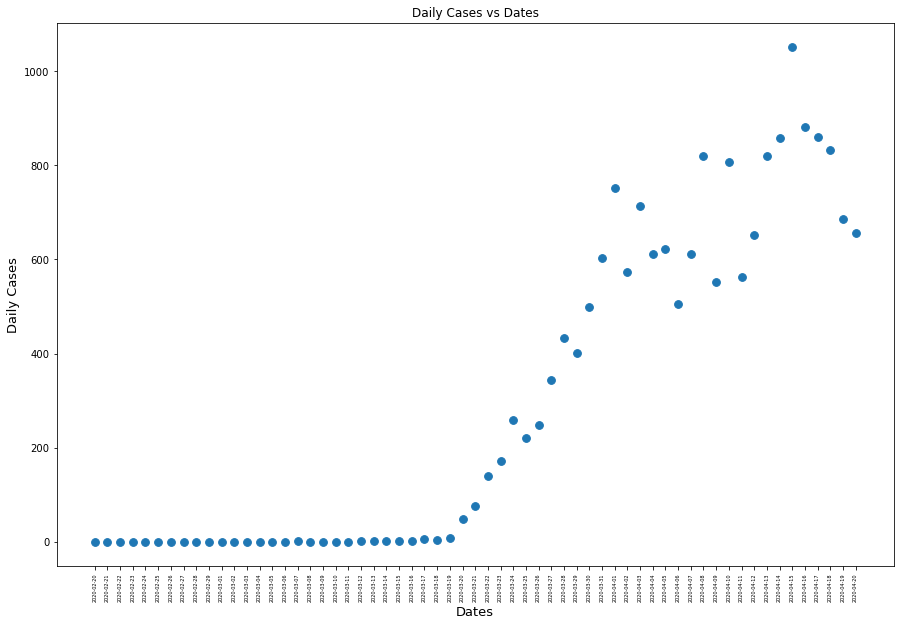

In [7]:
marchlock.plot(kind='scatter', x='date', y='daily_cases', figsize=(15, 10), s=60)
plt.title("Daily Cases vs Dates")
plt.xlabel("Dates", size = 13)
plt.ylabel("Daily Cases", size = 13)
plt.xticks(x, rotation = 'vertical', size = 5)
plt.show()

## CONCLUSION ##


Just by looking at the dataset, we can say that people were already getting tested for Covid however, we can not conclude any result of the tests. For the first quarter of the year there were no records of daily cases.

Since, it is hard to see if the lockdown actually had a positive or negative effect. We have decided to lag the data by 3 weeks to see more visible changes given that more data is provided on the second quarter.

# -------------------------------------------------------------------------------------------

## MODEL # 2 ##

- Index numbers [48:109] contains all information from March 16, 2020 to May 15,2020.
- Assigned a cutoff predictor of 15/4/2020.

In [8]:
march = quebec[53:114]
march.head()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed
53,QC,2020-03-16,2,0,0,0,1082
54,QC,2020-03-17,5,1,0,0,1402
55,QC,2020-03-18,4,1,0,0,1472
56,QC,2020-03-19,8,1,0,0,3035
57,QC,2020-03-20,48,1,0,0,3563


In [9]:
x = pd.to_datetime(march['date'])
y = march['daily_cases']

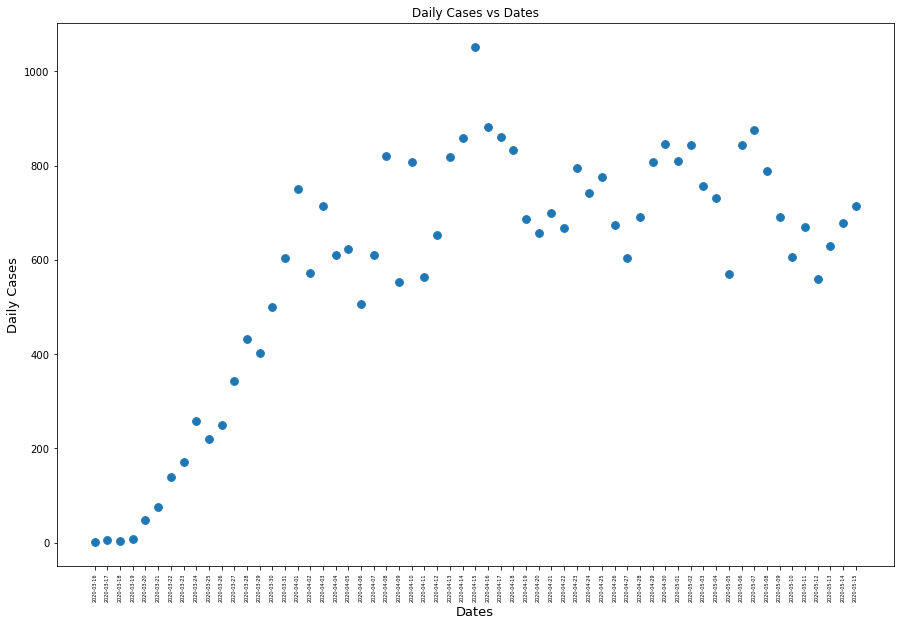

In [10]:
march.plot(kind='scatter', x='date', y='daily_cases', figsize=(15, 10), s=60)
plt.title("Daily Cases vs Dates")
plt.xlabel("Dates", size = 13)
plt.ylabel("Daily Cases", size = 13)
plt.xticks(x, rotation = 'vertical', size = 5)
plt.show()

In [11]:
rdd_march = march.assign(Threshold = march['date']> '2020-04-15')

In [12]:
rdd_march.insert(0, "day", range(1, 1 + len(rdd_march)))

## ADDING POLYNOMIAL FEATURE ##

In [13]:
rdd_march['day_sq'] = np.square(rdd_march['day'])
march

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed
53,QC,2020-03-16,2,0,0,0,1082
54,QC,2020-03-17,5,1,0,0,1402
55,QC,2020-03-18,4,1,0,0,1472
56,QC,2020-03-19,8,1,0,0,3035
57,QC,2020-03-20,48,1,0,0,3563
...,...,...,...,...,...,...,...
109,QC,2020-05-11,669,93,7,-6,6334
110,QC,2020-05-12,560,97,2,-8,8464
111,QC,2020-05-13,629,82,32,10,9137
112,QC,2020-05-14,679,66,-37,-4,10009


In [14]:
window = rdd_march[(rdd_march['day']>=0) & (rdd_march['day']<=61)]

result = smf.ols(formula = "daily_cases ~ day + day_sq + day *Threshold", 
                 data = window).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            daily_cases   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     95.05
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           2.77e-24
Time:                        17:11:21   Log-Likelihood:                -363.44
No. Observations:                  61   AIC:                             736.9
Df Residuals:                      56   BIC:                             747.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -96.2956     47.997     -2.006      0.050    -192.445      -0.146
Threshold[T.True]       360.5257    360.548      1.000      0.322    -361.738    1082.790
day                      40.5793      6.104      6.648      0.000      28.351      52.807
day:Threshold[T.True]   -15.8582     11.380     -1.393      0.169     -38.655       6.939
day_sq                   -0.3044      0.181     -1.685      0.098      -0.666       0.058
==============================================================================
Omnibus:                        0.083   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.122
Skew:                           0.077   Prob(JB):                        0.941
Kurtosis:                       2.846   Cond. No.                     4.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## REGRESSION DISCONTINUITY ##

The number 31 represents the lagged date which is 2020-04-15.

Text(0.5, 1.0, 'Regression Discontinuity')

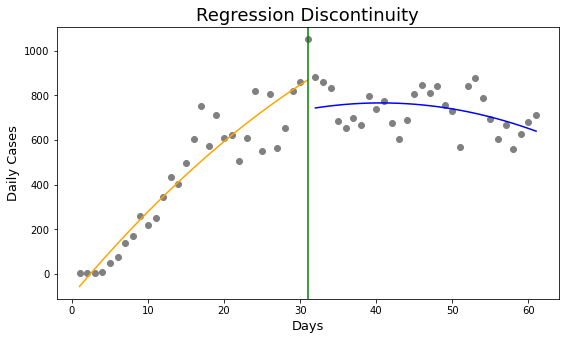

In [15]:
plt.figure(figsize=(9, 5))
plt.scatter(window.day,window.daily_cases, color="grey", alpha=1)
l=window[window.day<32].day.count()
plt.plot(window.day[0:l], result.predict()[0:l], '-', color="orange")
plt.plot(window.day[l:], result.predict()[l:], '-', color="blue")
plt.xlabel("Days", size = 13)
plt.ylabel("Daily Cases", size = 13)
plt.axvline(x=31,color="green", linestyle="-")
plt.title("Regression Discontinuity", fontsize="18")

## CONCLUSION ##


Given the lag date of April 15, 2020, we can conclude that the lockdown has decreased the cases of Covid reported daily in Quebec. By looking at the summary we can see that there is statiscal significance with the day and the intercept having Pvalues lower than 0.05. 